### Unconstrained and Constrained optimization of multivariate scalar functions
- minimize() routine provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in scipy.optimize. To demonstrate the minimization function, let's consider Rosenbrock function of the N variables.

#### Nelder-Mead Simplex Algorithm || Downhill Simplex Algorithm:
- Numerical method used to find the minimum or maximum of an Objective Function in a multidimensional space.
- Often applied to nonlinear optimization problems for which derivatives may not be known (i.e. non continuous functions).
- Heuristic search method that can converge to non-stationary points (derivative is non-zero).
- Because it does not use any gradient evaluations, it may take longer to find the optimal value.

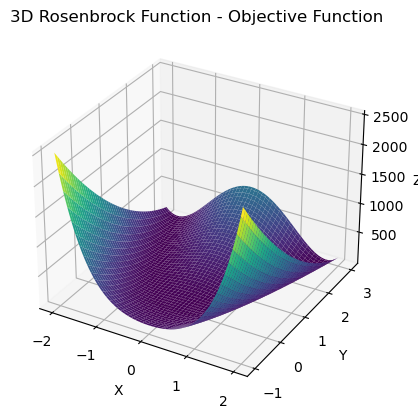

In [4]:
import numpy as np
from scipy.optimize import minimize, rosen # scipy has the Rosenbrock function built in
import matplotlib.pyplot as plt
%matplotlib inline

# Generate data for the 3D plot
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosen([X, Y])

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis')

# Add labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the title
ax.set_title('3D Rosenbrock Function - Objective Function')

# Show the plot
plt.show()

The Nelder-Mead optimization algorithm does not require any derivative information, instead it operates by maintaining a simplex, which is a geometrical shape, typically a triangle, in the parameter space. During each iteration, the algorithm explores the function space by performing one or more of the following operations:
- Reflection: The algorithm evaluates the function at a new point (vertex) that is reflected across the worst vertex (highest function value) of the simplex.
- Expansion: If the reflected point has a better function value (lower for minimization), the algorithm tries to move even further by expanding the simplex along that direction. This involves evaluating the function at a point beyond the reflection point.
- Contraction: If the reflected point doesn't improve the function value, the algorithm may try moving closer to the best vertex by contracting the simplex around the worst vertex. This is an attempt to narrow down the search space.
- Shrink: If none of the above operations lead to a better point, the algorithm reduces the size of the simplex by replacing all vertices except the best one with new points. This is a way to explore a smaller region of the parameter space.

The algorithm continues these iterations, adapting the simplex shape based on the function evaluations, until a convergence criterion is met, such as a small change in the function value, a small change in the size of the simplex, or a maximum number of iterations is reached.

In [7]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True, 'return_all': False})
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.861153433422115e-17
             x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
           nit: 339
          nfev: 571
 final_simplex: (array([[ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       ...,
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00]]), array([ 4.861e-17,  7.652e-17,  8.114e-17,  8.633e-17,
                        8.641e-17,  2.179e-16]))


### L-BFGS-B Algorithm (Limited Memory BFGS with Bounds Constraints)
- Optimization algorithm used for solving unconstrained or bound-constrained nonlinear optimization problems. 
- Advantages:
    - Efficiency: L-BFGS-B is particularly efficient for large-scale optimization problems because it employs limited-memory techniques. It doesn't explicitly store the Hessian matrix, making it well-suited for problems with a large number of variables.
    - Convergence: It often converges relatively quickly, especially when applied to smooth and well-behaved objective functions.
    - Scalability: It can handle problems with a large number of parameters and is widely used in machine learning, deep learning, and scientific computing.
- Disadvantages:
    - Noisy Objective Functions: L-BFGS-B may not perform well when dealing with noisy or stochastic objective functions (have a random/probablistic component), as it relies on accurate gradient information. In such cases, techniques like gradient averaging or stochastic gradient descent are often preferred.
    - Limited to Continuous Functions: It is more suitable for smooth and continuously differentiable objective functions. For nonsmooth or discontinuous functions, other optimization methods may be more appropriate.
    - Global Convergence: L-BFGS-B can sometimes converge to a local minimum, which is a common limitation of most local optimization methods. To mitigate this, it's important to try different starting points or use global optimization techniques if the problem has multiple minima.

In [12]:
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
# rose_der is the gradient of the Rosenbrock function
# rose_hess is the Hessian of the Rosenbrock function: the second-order partial derivatives of the Rosenbrock function

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])    

# accuracy of the solution is determined by the fucntional tolerance parameter
res = minimize(rosen, x0, method='L-BFGS-B', jac=rosen_der, options={'disp': True}, tol=1e-8) 

print(res)

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 3.4595653799594523e-10
        x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
      nit: 23
      jac: [-4.364e-04 -3.350e-04  4.254e-04 -6.843e-05 -8.642e-06]
     nfev: 25
     njev: 25
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


- This method only required 25 functional evaluations, compared to 571 functional evaluations in Nelder-meads algorithm.

### Newton-Conjugate Gradient Algorithm (Inexact Gradient Method)

- The Newton-Conjugate Gradient (NCG) algorithm is an optimization method commonly used for solving unconstrained optimization problems. 
- Inexact Gradient Methods: Refers to optimization algorithms where the gradient (first-order information) is computed approximately rather than exactly. It can encompass various algorithms, and NCG is one such method that falls under this category. In inexact methods, approximations or heuristics are often used to compute the gradient, and the method proceeds iteratively to reach the optimum.
- Newton-Conjugate Gradient Algorithm (NCG): This algorithm combines elements of the Newton method (which uses second-order information like the Hessian matrix for optimization) and the Conjugate Gradient method (which is a method for finding the minimum of a function). It typically involves a combination of both techniques, using conjugate gradient steps to avoid the computational complexity of dealing with the full Hessian matrix.
- It has some notable advantages and disadvantages: 
    - Superior Convergence: NCG typically converges faster than traditional gradient descent methods, especially when dealing with well-conditioned problems.
    - Second-Order Information: It utilizes second-order information through the Hessian matrix, which can provide more accurate and faster convergence.
    - Memory Efficient: NCG avoids storing and inverting the entire Hessian matrix, making it memory-efficient for high-dimensional problems.
    - Sensitivity to Initial Guess: The algorithm's performance can be sensitive to the initial guess, making it crucial to provide a good starting point.
    - Not Suitable for Large Datasets: NCG may not be suitable for problems with large datasets, as it can become computationally expensive.

In [16]:
from scipy.optimize import minimize, rosen, rosen_der, rosen_hess
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

# convergence is faster if the Hessian is provided (each iteration is more expensive though), but not required for this method 
res = minimize(rosen, x0, method='Newton-cg', jac=rosen_der, hess=rosen_hess, options={'disp': True}, tol=1e-8)
print(res)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 24
         Function evaluations: 33
         Gradient evaluations: 33
         Hessian evaluations: 24
 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 3.5306674342205174e-17
       x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
     nit: 24
     jac: [ 2.687e-08  9.267e-08  3.701e-07  1.485e-06 -8.526e-07]
    nfev: 33
    njev: 33
    nhev: 24


### Least Square Problems

In [25]:
# Quadratic Programming Problem
def fun_rosenbrock(x):
    return np.array(10 * (x[1] - x[0]**2), (1 - x[0]))

from scipy.optimize import least_squares
input = np.array([2, 2])

res = least_squares(fun_rosenbrock, input, verbose=1)
print(res)

`xtol` termination condition is satisfied.
Function evaluations 32, initial cost 2.0000e+02, final cost 2.0206e-13, first-order optimality 1.85e-05.
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [-6.357e-07]
           x: [ 1.456e+00  2.119e+00]
        cost: 2.0206335091726561e-13
         jac: [[-2.911e+01  1.000e+01]]
        grad: [ 1.851e-05 -6.357e-06]
  optimality: 1.8508102192605523e-05
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 32
        njev: 13


### Constrained Optimization

#### Financial Portfolio optimization problem:
- Porfolio consists of 4 different assets, and from the analysis of historical data, the average returns for each asset follow a uniform distribution:                                                                                                                           
    - returns ~ uniform[-0.25,0.75] * 100%

In [30]:
import pandas as pd
import numpy as np

np.random.seed(0)

# Generate data
df_returns = pd.DataFrame(np.random.rand(100, 4) - 0.25, columns=['A', 'B', 'C', 'D'])
df_returns

,A,B,C,D
0,0.298814,0.465189,0.352763,0.294883
1,0.173655,0.395894,0.187587,0.641773
2,0.713663,0.133442,0.541725,0.278895
3,0.318045,0.675597,-0.178964,-0.162871
4,-0.229782,0.582620,0.528157,0.620012
...,...,...,...,...
95,0.607723,0.207223,0.701874,0.325751
96,0.570767,0.658844,0.565524,-0.090586
97,0.378898,0.148434,-0.187287,0.174032
98,0.008684,0.599038,-0.216695,0.708983
